## Spambase Dataset
Dataset pochodzi z [kaggle](https://www.kaggle.com/datasets/somesh24/spambase) i składa się z różnych statystyk wygenerowanych z otrzymanych maili (głównie z procentowej zawartości wybranych słów i specjalnych znaków) oraz z etykietą mówiącą o tym, czy dany e-mail jest klasyfikowany jako spam, czy też nie.

In [1]:
import pandas as pd

dataset = pd.read_csv('spambase_csv.csv')
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

"Niestety" *dataset* nie zawiera żadnych kolumn z wartościami *nullowymi*, więc musimy sami stworzyć luki. Ustawmy najpierw *seed*, z którego będziemy korzystać w całym projekcie.

In [3]:
seed = 1337

Mamy 4601 wierszy oraz 57 interesujących nas wartości w każdej (nie chcę tworzyć luk w etykietach), tj. łącznie *262,257* wartości. Powiedzmy, że chcemy, aby ok. 5% komórek było wypełnionych *NaN*ami.

In [4]:
import random

data = dataset.drop(columns=['class'])
labels = dataset['class']

random.seed(seed)

num_columns = data.shape[1]
num_rows = data.shape[0]
total = num_rows * num_columns
n = total // 20
numbers = set()
while len(numbers) < n:
    numbers.add(random.randint(0, total))
numbers = list(numbers)
numbers[:10]

[65538, 6, 262153, 262154, 131082, 98321, 32785, 65556, 32791, 163873]

Każdą wylosowaną liczbę będziemy teraz konwertowali na odpowiedni indeks w datasecie. 

In [5]:
import numpy as np

for number in numbers:
    row, column = number // num_columns, number % num_columns
    data.iat[row, column] = np.nan
    
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,NaN,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,NaN,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,NaN,0.07,0.00,0.94,...,NaN,NaN,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,NaN,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,NaN,0.0,0.135,0.000,0.000,3.537,40.0,191.0


Ponownie sprawdźmy liczbę *null*i:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4383 non-null   float64
 1   word_freq_address           4359 non-null   float64
 2   word_freq_all               4343 non-null   float64
 3   word_freq_3d                4367 non-null   float64
 4   word_freq_our               4385 non-null   float64
 5   word_freq_over              4382 non-null   float64
 6   word_freq_remove            4381 non-null   float64
 7   word_freq_internet          4368 non-null   float64
 8   word_freq_order             4388 non-null   float64
 9   word_freq_mail              4369 non-null   float64
 10  word_freq_receive           4402 non-null   float64
 11  word_freq_will              4339 non-null   float64
 12  word_freq_people            4376 non-null   float64
 13  word_freq_report            4380 

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4383.000000,4359.000000,4343.000000,4367.000000,4385.000000,4382.000000,4381.000000,4368.000000,4388.000000,4369.000000,4402.000000,4339.000000,4376.000000,4380.000000,4353.000000,4397.000000,4371.000000,4365.000000,4359.000000,4362.000000,4400.000000,4372.000000,4373.000000,4386.000000,4372.000000,4367.000000,4392.000000,4385.000000,4377.000000,4360.000000,4361.000000,4361.000000,4353.000000,4386.000000,4373.000000,4354.000000,4349.000000,4380.000000,4360.000000,4379.000000,4376.000000,4373.000000,4385.000000,4363.000000,4368.000000,4370.000000,4353.000000,4362.000000,4360.000000,4372.000000,4350.000000,4373.000000,4383.000000,4340.000000,4398.000000,4375.000000,4375.000000
mean,0.105494,0.215361,0.280813,0.068793,0.313763,0.095842,0.115054,0.105151,0.089991,0.238718,0.060968,0.538324,0.094088,0.059881,0.047409,0.245713,0.143814,0.186685,1.661755,0.087125,0.807457,0.118792,0.101475,0.093005,0.542836,0.259166,0.772632,0.123024,0.096255,0.104206,0.065863,0.045368,0.097225,0.048525,0.105180,0.099596,0.138459,0.013146,0.079259,0.063156,0.043190,0.128658,0.045574,0.077043,0.300506,0.179421,0.005215,0.032407,0.036238,0.137593,0.017218,0.272041,0.076350,0.044526,5.246067,52.689600,280.305143
std,0.308533,1.306364,0.505388,1.431944,0.671920,0.272309,0.394845,0.404086,0.279369,0.644470,0.204305,0.857327,0.302030,0.340456,0.252212,0.795970,0.448318,0.534015,1.765929,0.520858,1.198314,1.016130,0.350780,0.442899,1.656395,0.856240,3.384791,0.522384,0.558797,0.460649,0.407041,0.326209,0.557437,0.330978,0.533905,0.409431,0.428712,0.224730,0.438120,0.342838,0.363853,0.743579,0.221837,0.582834,1.017417,0.919423,0.072663,0.291315,0.228100,0.260008,0.110894,0.830417,0.249458,0.439785,32.399849,198.257777,602.768256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.586500,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [8]:
for column in data.columns:
    print(data[column].value_counts())
    print()

word_freq_make
0.00    3384
0.10      49
0.09      39
0.17      36
0.08      30
0.05      23
0.07      20
0.33      19
0.34      19
0.06      17
0.14      16
0.19      16
0.26      16
0.12      16
0.23      15
0.43      15
0.27      14
0.13      14
0.32      14
0.31      13
0.18      13
0.40      13
0.16      13
0.15      13
0.11      12
0.51      12
0.29      12
0.44      12
0.54      12
0.30      12
0.49      12
0.39      12
0.47      12
0.25      11
0.58      11
0.46      11
2.00      11
0.22      11
0.35      11
0.20      10
0.52       9
0.90       9
0.67       9
0.28       9
0.41       8
0.50       8
0.59       8
0.36       8
0.04       7
0.42       7
0.77       7
0.76       7
0.45       7
1.24       7
0.74       7
0.71       7
0.87       7
0.68       6
0.64       6
0.60       6
0.21       6
0.73       6
0.38       6
0.48       6
0.24       6
0.37       6
0.78       5
0.56       5
1.18       5
0.53       5
1.00       5
0.62       5
0.02       4
1.03       4
0.95       4
0.84      

word_freq_technology
0.00    3777
0.09      14
0.08      12
0.13      10
0.42      10
0.16      10
0.43      10
0.58      10
0.86       9
0.34       9
0.15       9
0.19       9
0.31       9
0.24       9
0.35       9
0.11       8
0.37       8
0.20       8
0.25       8
0.12       7
0.32       7
0.10       7
0.39       7
0.52       7
0.27       7
0.22       7
0.74       6
0.49       6
0.54       6
0.62       6
0.26       6
4.76       6
0.68       6
0.05       6
1.16       5
0.53       5
0.87       5
0.73       5
0.51       5
0.66       5
0.78       5
0.38       5
0.23       5
1.28       5
0.44       5
0.41       5
0.28       5
0.47       4
1.58       4
0.07       4
0.61       4
0.50       4
0.91       4
0.21       4
2.04       4
0.18       4
0.63       4
0.90       4
0.57       4
1.03       4
0.98       4
0.85       4
0.30       4
0.64       4
0.72       4
0.46       3
0.88       3
0.04       3
0.29       3
1.31       3
0.59       3
0.17       3
1.21       3
0.55       3
0.45       3
1.26

Kolumny opisujące **word_freq_*** oraz **capital_run_*** uzupełnimy medianą, a resztę - średnią. Do wyboru kolumn w transformatorze wykorzystam **DataFrameSelector** z notebooka **Z09_E_titanic**.

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Zanim przejdziemy do tworzenia pipeline'a, usuńmy dwie kolumny - **word_freq_george** oraz **word_freq_650**. Zgodnie z opisem na kaggle, *George* jest imieniem jednego z pracowników, a *650* numerem kierunkowym - więc jeśli chcemy stworzyć w miarę ogólny filter spamu, to powinniśmy się pozbyć tych kolumn.

In [10]:
data.drop(columns=['word_freq_george', 'word_freq_650'], inplace=True)

In [11]:
median_columns = []
avg_columns = []
for column in data.columns:
    if 'word_freq_' in column or 'capital_run_' in column:
        median_columns.append(column)
    else:
        avg_columns.append(column)

In [12]:
median_columns

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total'

In [13]:
avg_columns

['char_freq_%3B',
 'char_freq_%28',
 'char_freq_%5B',
 'char_freq_%21',
 'char_freq_%24',
 'char_freq_%23']

In [14]:
from sklearn.pipeline import FeatureUnion

median_pipeline = Pipeline([
    ('selector', DataFrameSelector(median_columns)),
    ('imputer', SimpleImputer(strategy='median')),
])

avg_pipeline = Pipeline([
    ('selector', DataFrameSelector(avg_columns)),
    ('imputer', SimpleImputer(strategy='mean'))
])

fill_pipeline = FeatureUnion(
    transformer_list = [
        ('median', median_pipeline),
        ('average', avg_pipeline),
    ]
)

In [15]:
data_filled = fill_pipeline.fit_transform(data)

In [16]:
data_filled[0]

array([0.00000000e+00, 6.40000000e-01, 6.40000000e-01, 0.00000000e+00,
       3.20000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.40000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.20000000e-01,
       0.00000000e+00, 1.29000000e+00, 1.93000000e+00, 0.00000000e+00,
       9.60000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.75600000e+00, 6.10000000e+01,
       2.78000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.78000000e-01, 0.00000000e+00, 4.45260369e-02])

Spójrzmy jeszcze na **PCA**:

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA()

data_filled = StandardScaler().fit_transform(data_filled)
pca_features = model.fit_transform(data_filled)

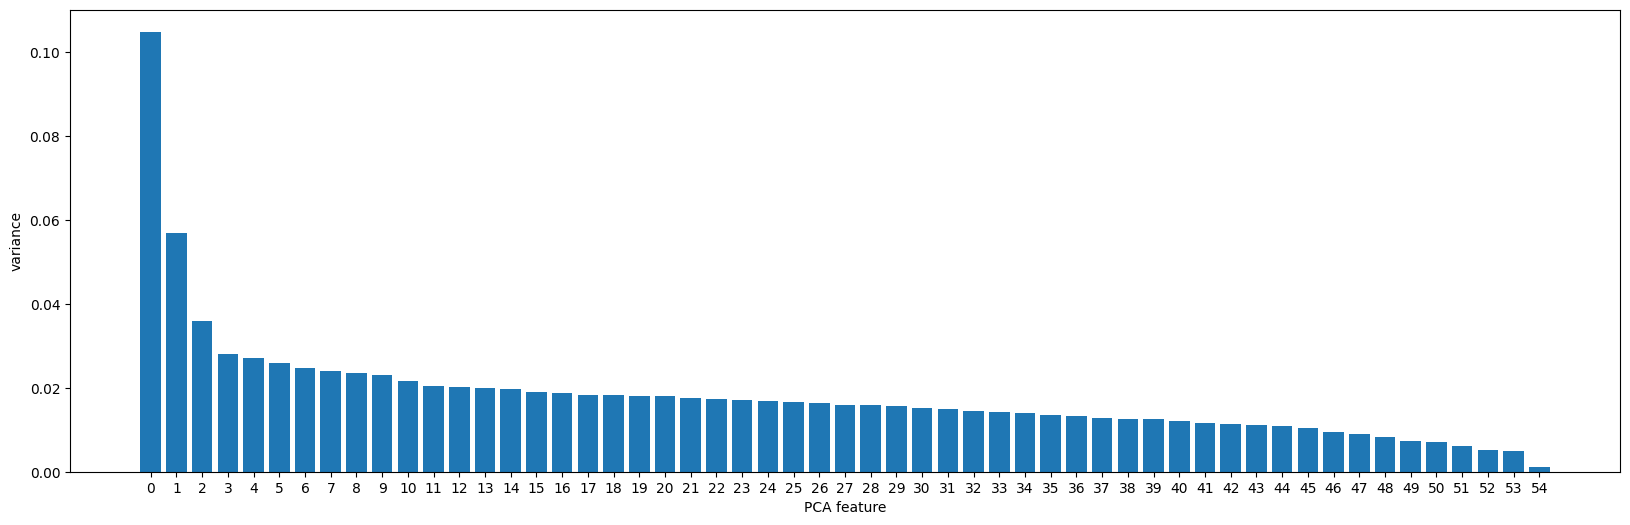

In [18]:
features = range(model.n_components_)
plt.figure(figsize=(20,6))
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Zredukujmy dane do 11 wymiarów.

In [19]:
final_pipeline = Pipeline([
    ('fill', fill_pipeline),
    ('scale', StandardScaler()),
    #('pca', PCA(11)),
])

Podzielmy na **train** i **test**.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

## Pierwszy model - SVM rbf

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

pipe = Pipeline([
    ('preprocessing', final_pipeline), 
    ('pca', PCA(11)),
    ('classifier', SVC(kernel='rbf'))
])

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

param_grid = {
            'pca': [PCA(11), None],
            'classifier__gamma': [0.001, 0.001, 0.01, 0.1, 1., 10., 100.],
            'classifier__C': [0.001, 0.01, 0.1, 1., 10., 100., 1000.],
}


grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=10)

grid_1.fit(X_train, y_train)
grid_1.best_params_

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5; 1/98] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 1/5; 1/98] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 2/5; 1/98] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 2/5; 1/98] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 3/5; 1/98] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 3/5; 1/98] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 4/5; 1/98] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 4/5; 1/98] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4

[CV 3/5; 8/98] END classifier__C=0.001, classifier__gamma=0.1, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 4/5; 8/98] START classifier__C=0.001, classifier__gamma=0.1, pca=None.......
[CV 4/5; 8/98] END classifier__C=0.001, classifier__gamma=0.1, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 5/5; 8/98] START classifier__C=0.001, classifier__gamma=0.1, pca=None.......
[CV 5/5; 8/98] END classifier__C=0.001, classifier__gamma=0.1, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 1/5; 9/98] START classifier__C=0.001, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 1/5; 9/98] END classifier__C=0.001, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 2/5; 9/98] START classifier__C=0.001, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 2/5; 9/98] END classifier__C=0.001, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[

[CV 5/5; 15/98] END classifier__C=0.01, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 1/5; 16/98] START classifier__C=0.01, classifier__gamma=0.001, pca=None.....
[CV 1/5; 16/98] END classifier__C=0.01, classifier__gamma=0.001, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 2/5; 16/98] START classifier__C=0.01, classifier__gamma=0.001, pca=None.....
[CV 2/5; 16/98] END classifier__C=0.01, classifier__gamma=0.001, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 3/5; 16/98] START classifier__C=0.01, classifier__gamma=0.001, pca=None.....
[CV 3/5; 16/98] END classifier__C=0.01, classifier__gamma=0.001, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 4/5; 16/98] START classifier__C=0.01, classifier__gamma=0.001, pca=None.....
[CV 4/5; 16/98] END classifier__C=0.01, classifier__gamma=0.001, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 5/5; 16/98] START cla

[CV 3/5; 23/98] END classifier__C=0.01, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 4/5; 23/98] START classifier__C=0.01, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 4/5; 23/98] END classifier__C=0.01, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 5/5; 23/98] START classifier__C=0.01, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 5/5; 23/98] END classifier__C=0.01, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 1/5; 24/98] START classifier__C=0.01, classifier__gamma=1.0, pca=None.......
[CV 1/5; 24/98] END classifier__C=0.01, classifier__gamma=1.0, pca=None;, score=(train=0.606, test=0.606) total time=   0.6s
[CV 2/5; 24/98] START classifier__C=0.01, classifier__gamma=1.0, pca=None.......
[CV 2/5; 24/98] END classifier__C=0.01, classifier__gamma=1.0, pca=None;, score=(train=0.606, test=0.606) tota

[CV 1/5; 31/98] END classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.790, test=0.825) total time=   0.3s
[CV 2/5; 31/98] START classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 2/5; 31/98] END classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.783, test=0.776) total time=   0.3s
[CV 3/5; 31/98] START classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 3/5; 31/98] END classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.792, test=0.776) total time=   0.4s
[CV 4/5; 31/98] START classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 4/5; 31/98] END classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.785, test=0.777) total time=   0.3s
[CV 5/5; 31/98] START classifier__C=0.1, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 5/5; 31/98] END classifier__C=0.1, classifier__gamma=0.001, pca=

[CV 4/5; 38/98] END classifier__C=0.1, classifier__gamma=1.0, pca=None;, score=(train=0.606, test=0.606) total time=   0.7s
[CV 5/5; 38/98] START classifier__C=0.1, classifier__gamma=1.0, pca=None........
[CV 5/5; 38/98] END classifier__C=0.1, classifier__gamma=1.0, pca=None;, score=(train=0.612, test=0.609) total time=   0.6s
[CV 1/5; 39/98] START classifier__C=0.1, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 1/5; 39/98] END classifier__C=0.1, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.5s
[CV 2/5; 39/98] START classifier__C=0.1, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 2/5; 39/98] END classifier__C=0.1, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.610, test=0.606) total time=   0.5s
[CV 3/5; 39/98] START classifier__C=0.1, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 3/5; 39/98] END classifier__C=0.1, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.60

[CV 2/5; 46/98] END classifier__C=1.0, classifier__gamma=0.001, pca=None;, score=(train=0.894, test=0.908) total time=   0.2s
[CV 3/5; 46/98] START classifier__C=1.0, classifier__gamma=0.001, pca=None......
[CV 3/5; 46/98] END classifier__C=1.0, classifier__gamma=0.001, pca=None;, score=(train=0.896, test=0.894) total time=   0.3s
[CV 4/5; 46/98] START classifier__C=1.0, classifier__gamma=0.001, pca=None......
[CV 4/5; 46/98] END classifier__C=1.0, classifier__gamma=0.001, pca=None;, score=(train=0.903, test=0.879) total time=   0.3s
[CV 5/5; 46/98] START classifier__C=1.0, classifier__gamma=0.001, pca=None......
[CV 5/5; 46/98] END classifier__C=1.0, classifier__gamma=0.001, pca=None;, score=(train=0.897, test=0.885) total time=   0.2s
[CV 1/5; 47/98] START classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11)
[CV 1/5; 47/98] END classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.918, test=0.918) total time=   0.1s
[CV 2/5; 47/98] START 

[CV 5/5; 53/98] END classifier__C=1.0, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.956, test=0.690) total time=   0.6s
[CV 1/5; 54/98] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 1/5; 54/98] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.997, test=0.659) total time=   0.9s
[CV 2/5; 54/98] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 2/5; 54/98] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.997, test=0.666) total time=   0.8s
[CV 3/5; 54/98] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 3/5; 54/98] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.997, test=0.666) total time=   0.8s
[CV 4/5; 54/98] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 4/5; 54/98] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.997, test=0.655) total time=   0.8s
[CV 5/5; 54/98] START classifier__C

[CV 3/5; 61/98] END classifier__C=10.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.919, test=0.925) total time=   0.1s
[CV 4/5; 61/98] START classifier__C=10.0, classifier__gamma=0.01, pca=PCA(n_components=11)
[CV 4/5; 61/98] END classifier__C=10.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.916, test=0.899) total time=   0.1s
[CV 5/5; 61/98] START classifier__C=10.0, classifier__gamma=0.01, pca=PCA(n_components=11)
[CV 5/5; 61/98] END classifier__C=10.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.915, test=0.909) total time=   0.1s
[CV 1/5; 62/98] START classifier__C=10.0, classifier__gamma=0.01, pca=None......
[CV 1/5; 62/98] END classifier__C=10.0, classifier__gamma=0.01, pca=None;, score=(train=0.957, test=0.929) total time=   0.1s
[CV 2/5; 62/98] START classifier__C=10.0, classifier__gamma=0.01, pca=None......
[CV 2/5; 62/98] END classifier__C=10.0, classifier__gamma=0.01, pca=None;, score=(train=0.956, test=0.91

[CV 1/5; 69/98] END classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.790, test=0.622) total time=   0.8s
[CV 2/5; 69/98] START classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 2/5; 69/98] END classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.787, test=0.624) total time=   0.8s
[CV 3/5; 69/98] START classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 3/5; 69/98] END classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.800, test=0.630) total time=   0.8s
[CV 4/5; 69/98] START classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 4/5; 69/98] END classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.806, test=0.629) total time=   0.9s
[CV 5/5; 69/98] START classifier__C=10.0, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 5/5; 69/98] END classifier__C=10.0, classifier__gamma=10

[CV 3/5; 76/98] END classifier__C=100.0, classifier__gamma=0.01, pca=None;, score=(train=0.974, test=0.924) total time=   0.2s
[CV 4/5; 76/98] START classifier__C=100.0, classifier__gamma=0.01, pca=None.....
[CV 4/5; 76/98] END classifier__C=100.0, classifier__gamma=0.01, pca=None;, score=(train=0.975, test=0.913) total time=   0.2s
[CV 5/5; 76/98] START classifier__C=100.0, classifier__gamma=0.01, pca=None.....
[CV 5/5; 76/98] END classifier__C=100.0, classifier__gamma=0.01, pca=None;, score=(train=0.975, test=0.923) total time=   0.2s
[CV 1/5; 77/98] START classifier__C=100.0, classifier__gamma=0.1, pca=PCA(n_components=11)
[CV 1/5; 77/98] END classifier__C=100.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.965, test=0.916) total time=   0.2s
[CV 2/5; 77/98] START classifier__C=100.0, classifier__gamma=0.1, pca=PCA(n_components=11)
[CV 2/5; 77/98] END classifier__C=100.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.962, test=0.917) total time

[CV 5/5; 83/98] END classifier__C=100.0, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.763, test=0.618) total time=   0.8s
[CV 1/5; 84/98] START classifier__C=100.0, classifier__gamma=100.0, pca=None....
[CV 1/5; 84/98] END classifier__C=100.0, classifier__gamma=100.0, pca=None;, score=(train=1.000, test=0.621) total time=   1.0s
[CV 2/5; 84/98] START classifier__C=100.0, classifier__gamma=100.0, pca=None....
[CV 2/5; 84/98] END classifier__C=100.0, classifier__gamma=100.0, pca=None;, score=(train=1.000, test=0.636) total time=   1.1s
[CV 3/5; 84/98] START classifier__C=100.0, classifier__gamma=100.0, pca=None....
[CV 3/5; 84/98] END classifier__C=100.0, classifier__gamma=100.0, pca=None;, score=(train=0.999, test=0.637) total time=   1.0s
[CV 4/5; 84/98] START classifier__C=100.0, classifier__gamma=100.0, pca=None....
[CV 4/5; 84/98] END classifier__C=100.0, classifier__gamma=100.0, pca=None;, score=(train=0.999, test=0.621) total time=   1.1s
[CV 5/5; 84/98] STAR

[CV 2/5; 91/98] END classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.977, test=0.902) total time=   0.6s
[CV 3/5; 91/98] START classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11)
[CV 3/5; 91/98] END classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.969, test=0.886) total time=   0.6s
[CV 4/5; 91/98] START classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11)
[CV 4/5; 91/98] END classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.974, test=0.882) total time=   0.7s
[CV 5/5; 91/98] START classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11)
[CV 5/5; 91/98] END classifier__C=1000.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.977, test=0.882) total time=   0.7s
[CV 1/5; 92/98] START classifier__C=1000.0, classifier__gamma=0.1, pca=None.....
[CV 1/5; 92/98] END classifier__C=1000.0, classifier__gamma=0.1, pca=No

[CV 4/5; 98/98] END classifier__C=1000.0, classifier__gamma=100.0, pca=None;, score=(train=1.000, test=0.620) total time=   1.2s
[CV 5/5; 98/98] START classifier__C=1000.0, classifier__gamma=100.0, pca=None...
[CV 5/5; 98/98] END classifier__C=1000.0, classifier__gamma=100.0, pca=None;, score=(train=1.000, test=0.633) total time=   1.1s


{'classifier__C': 100.0, 'classifier__gamma': 0.001, 'pca': None}

In [22]:
grid_1.cv_results_['params'] 

[{'classifier__C': 0.001,
  'classifier__gamma': 0.001,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.001, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 0.001,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.001, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 0.01,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.01, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 0.1,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.1, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 1.0,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 1.0, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 10.0,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 10.0, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 100.0,
  'pca': PCA(n_compo

In [23]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

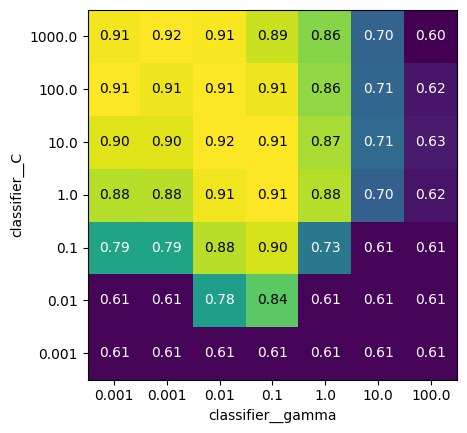

In [24]:
scores = np.array(grid_1.cv_results_['mean_test_score']).reshape(7, 7, 2)
scores = scores[:, :, 0]
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

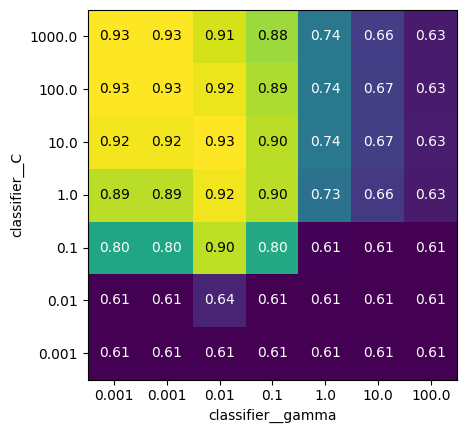

In [25]:
scores = np.array(grid_1.cv_results_['mean_test_score']).reshape(7, 7, 2)
scores = scores[:, :, 1]
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

In [26]:
from sklearn import metrics

def print_metrics(model, X_test, y_test):
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))

In [27]:
print_metrics(grid_1.best_estimator_, X_test, y_test)

precision_score: 0.9300291545189504
recall_score: 0.8787878787878788
f1_score: 0.9036827195467422
accuracy_score: 0.9261672095548317


## Drugi model - XGBoost

In [28]:
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier

param_distribution = {
    'classifier__max_depth': randint(6, 50),
    'classifier__learning_rate': uniform(0.001, 0.1-0.001),
    'classifier__n_estimators': randint(150, 500),
    'classifier__gamma': uniform(0, 3),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__min_child_weight': randint(1, 11)
}

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('pca', PCA(11)),
    ('classifier', XGBClassifier())
])
                 
grid_2 = RandomizedSearchCV(pipe, param_distribution, cv=kfold, return_train_score=True, verbose=10, n_iter=30, n_jobs=-1)

grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'classifier__colsample_bytree': 0.5637404015971581,
 'classifier__gamma': 1.536516403295285,
 'classifier__learning_rate': 0.012122184933635115,
 'classifier__max_depth': 40,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 453,
 'classifier__subsample': 0.5994469082272765}

In [29]:
print_metrics(grid_2.best_estimator_, X_test, y_test)

precision_score: 0.8974358974358975
recall_score: 0.8677685950413223
f1_score: 0.8823529411764707
accuracy_score: 0.9087947882736156


In [30]:
pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('classifier', XGBClassifier())
])
                 
grid_3 = RandomizedSearchCV(pipe, param_distribution, cv=kfold, return_train_score=True, verbose=10, n_iter=30, n_jobs=-1)

grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'classifier__colsample_bytree': 0.856293079596439,
 'classifier__gamma': 1.3757230623330203,
 'classifier__learning_rate': 0.054643742069566674,
 'classifier__max_depth': 20,
 'classifier__min_child_weight': 3,
 'classifier__n_estimators': 277,
 'classifier__subsample': 0.8954951918171445}

In [31]:
print_metrics(grid_3.best_estimator_, X_test, y_test)

precision_score: 0.9232954545454546
recall_score: 0.8953168044077136
f1_score: 0.9090909090909092
accuracy_score: 0.9294245385450597


W obu przypadkach **brak PCA** daje lepsze wyniki.

## PIerwsza sieć neuronowa

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, History

keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=[30], learning_rate=3e-3, input_shape=(X_train.shape[1], )):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons[layer % len(n_neurons)], activation='relu'))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [33]:
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)
keras_class

C:\Users\krzys\AppData\Local\Temp\ipykernel_16744\1152597368.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

training_histories = []

class TrainingHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_history.append(logs)

    def on_train_end(self, logs=None):
        training_histories.append(self.epoch_history)

param_grid = {
    'classifier__n_hidden': [1, 2, 3, 4],
    'classifier__n_neurons': [[300], [100], [50], [100, 50, 20], [300, 150, 50, 10], [50, 10], [20, 50, 100]],
    'classifier__epochs': [64],
    'classifier__batch_size': [32],
    'classifier__validation_split': [0.1],
    'classifier__callbacks': [[
        EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1), 
        LearningRateScheduler(step_decay),
        TrainingHistory(),
    ]],
}

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('classifier', keras_class)
])

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, verbose=2, n_jobs=-1)
grid_4.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Epoch 1/64
104/104 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.8967 - val_loss: 0.3107 - val_accuracy: 0.8859 - lr: 0.0100
Epoch 2/64
104/104 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9248 - val_loss: 0.2231 - val_accuracy: 0.9158 - lr: 0.0100
Epoch 3/64
104/104 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9278 - val_loss: 0.2770 - val_accuracy: 0.9049 - lr: 0.0100
Epoch 4/64
104/104 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9303 - val_loss: 0.2155 - val_accuracy: 0.9185 - lr: 0.0100
Epoch 5/64
104/104 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9293 - val_loss: 0.2277 - val_accuracy: 0.9076 - lr: 0.0100
Epoch 6/64
104/104 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9327 - val_loss: 0.2414 - val_accuracy: 0.9022 - lr: 0.0100
Epoch 7/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('fill',
                                                         FeatureUnion(transformer_list=[('median',
                                                                                         Pipeline(steps=[('selector',
                                                                                                          DataFrameSelector(attribute_names=['word_freq_make',
                                                                                                                                             'word_freq_address',
                                                                                                                                             'word_freq_all',
                                                                                                                                             'word_freq_3d',
                                                                                                                                             'word_freq_our',
                                                                                                                                             'word_freq_over',
                                                                                                                                             'wo...
                         'classifier__callbacks': [[<keras.callbacks.EarlyStopping object at 0x000001B10997F1D0>,
                                                    <keras.callbacks.LearningRateScheduler object at 0x000001B114720910>,
                                                    <__main__.TrainingHistory object at 0x000001B117194B90>]],
                         'classifier__epochs': [64],
                         'classifier__n_hidden': [1, 2, 3, 4],
                         'classifier__n_neurons': [[300], [100], [50],
                                                   [100, 50, 20],
                                                   [300, 150, 50, 10], [50, 10],
                                                   [20, 50, 100]],
                         'classifier__validation_split': [0.1]},
             verbose=2)

In [35]:
grid_4.best_params_

{'classifier__batch_size': 32,
 'classifier__callbacks': [<keras.callbacks.EarlyStopping at 0x1b10997f1d0>,
 'classifier__epochs': 64,
 'classifier__n_hidden': 1,
 'classifier__n_neurons': [100, 50, 20],
 'classifier__validation_split': 0.1}

In [36]:
print_metrics(grid_4, X_test, y_test)

29/29 [==============================] - 0s 659us/step
precision_score: 0.9269005847953217
29/29 [==============================] - 0s 642us/step
recall_score: 0.8732782369146006
29/29 [==============================] - 0s 661us/step
f1_score: 0.899290780141844
29/29 [==============================] - 0s 641us/step
accuracy_score: 0.9229098805646037


In [37]:
training_histories

[[{'loss': 0.2854762673377991,
   'accuracy': 0.89673912525177,
   'val_loss': 0.31065359711647034,
   'val_accuracy': 0.885869562625885,
   'lr': 0.01},
  {'loss': 0.20972149074077606,
   'accuracy': 0.9248188138008118,
   'val_loss': 0.22312858700752258,
   'val_accuracy': 0.91576087474823,
   'lr': 0.01},
  {'loss': 0.20627401769161224,
   'accuracy': 0.927838146686554,
   'val_loss': 0.27697834372520447,
   'val_accuracy': 0.904891312122345,
   'lr': 0.01},
  {'loss': 0.1976342350244522,
   'accuracy': 0.9302536249160767,
   'val_loss': 0.21551519632339478,
   'val_accuracy': 0.91847825050354,
   'lr': 0.01},
  {'loss': 0.20049695670604706,
   'accuracy': 0.929347813129425,
   'val_loss': 0.22768747806549072,
   'val_accuracy': 0.907608687877655,
   'lr': 0.01},
  {'loss': 0.18571782112121582,
   'accuracy': 0.9326691031455994,
   'val_loss': 0.24141603708267212,
   'val_accuracy': 0.9021739363670349,
   'lr': 0.01},
  {'loss': 0.1867130547761917,
   'accuracy': 0.9344806671142578,

In [39]:
# learning_history = training_histories[grid_4.best_index_]

In [40]:
# pd.DataFrame(learning_history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()

# # print(learning_history)

## Druga sieć neuronowa (CNN)

In [41]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

keras.backend.clear_session()

def build_model_cnn(n_conv=1, filters=[32], kernel_sizes=[3],
                    pool_sizes=[2], 
                    n_neurons=[30], learning_rate=3e-3, 
                    input_shape=(X_train.shape[1], 1)):
    model = keras.models.Sequential()
    for layer in range(n_conv):
        if layer == 0:
            model.add(keras.layers.Conv1D(filters=filters[0], kernel_size=kernel_sizes[0], activation='relu', input_shape=input_shape))
        else:
            model.add(keras.layers.Conv1D(filters=filters[layer % len(pool_sizes)], kernel_size=kernel_sizes[layer % len(pool_sizes)], activation='relu'))
        model.add(keras.layers.MaxPooling1D(pool_size=pool_sizes[layer % len(pool_sizes)]))
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for neurons in n_neurons:
        model.add(keras.layers.Dense(neurons, activation='relu'))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [42]:
lrate = LearningRateScheduler(step_decay)

keras_class_cnn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model_cnn)

C:\Users\krzys\AppData\Local\Temp\ipykernel_16744\1694379145.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class_cnn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model_cnn)


In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

training_histories_cnn = []

class TrainingHistoryCNN(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_history.append(logs)

    def on_train_end(self, logs=None):
        training_histories_cnn.append(self.epoch_history)

param_grid = {
    'classifier__n_conv': [2],
    'classifier__filters': [[32], [128, 64, 32]],
    'classifier__kernel_sizes': [[3]],
    'classifier__pool_sizes': [[2]],
    'classifier__n_neurons': [[100, 50, 20], [300, 150, 50, 10], [50, 10]],
    'classifier__epochs': [64],
    'classifier__batch_size': [32],
    'classifier__validation_split': [0.1],
    'classifier__callbacks': [[
        EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1), 
        LearningRateScheduler(step_decay),
        TrainingHistoryCNN(),
    ]],
}

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('classifier', keras_class_cnn)
])

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, verbose=2, n_jobs=-1)
grid_5.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/64
104/104 [==============================] - 2s 6ms/step - loss: 0.3477 - accuracy: 0.8575 - val_loss: 0.2710 - val_accuracy: 0.8832 - lr: 0.0100
Epoch 2/64
104/104 [==============================] - 1s 5ms/step - loss: 0.2691 - accuracy: 0.9001 - val_loss: 0.3539 - val_accuracy: 0.8288 - lr: 0.0100
Epoch 3/64
104/104 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.9100 - val_loss: 0.2332 - val_accuracy: 0.9076 - lr: 0.0100
Epoch 4/64
104/104 [==============================] - 1s 5ms/step - loss: 0.2277 - accuracy: 0.9173 - val_loss: 0.2202 - val_accuracy: 0.9103 - lr: 0.0100
Epoch 5/64
104/104 [==============================] - 0s 5ms/step - loss: 0.2060 - accuracy: 0.9245 - val_loss: 0.2695 - val_accuracy: 0.8913 - lr: 0.0100
Epoch 6/64
104/104 [==============================] - 1s 5ms/step - loss: 0.2127 - accuracy: 0.9230 - val_loss: 0.2838 - val_accuracy: 0.8804 - lr: 0.0100
Epoch 7/64

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('fill',
                                                         FeatureUnion(transformer_list=[('median',
                                                                                         Pipeline(steps=[('selector',
                                                                                                          DataFrameSelector(attribute_names=['word_freq_make',
                                                                                                                                             'word_freq_address',
                                                                                                                                             'word_freq_all',
                                                                                                                                             'word_freq_3d',
                                                                                                                                             'word_freq_our',
                                                                                                                                             'word_freq_over',
                                                                                                                                             'wo...
                                                    <keras.callbacks.LearningRateScheduler object at 0x000001B11A802E90>,
                                                    <__main__.TrainingHistoryCNN object at 0x000001B11A801650>]],
                         'classifier__epochs': [64],
                         'classifier__filters': [[32], [128, 64, 32]],
                         'classifier__kernel_sizes': [[3]],
                         'classifier__n_conv': [2],
                         'classifier__n_neurons': [[100, 50, 20],
                                                   [300, 150, 50, 10],
                                                   [50, 10]],
                         'classifier__pool_sizes': [[2]],
                         'classifier__validation_split': [0.1]},
             verbose=2)

In [44]:
grid_5.best_params_

{'classifier__batch_size': 32,
 'classifier__callbacks': [<keras.callbacks.EarlyStopping at 0x1b11a800050>,
 'classifier__epochs': 64,
 'classifier__filters': [128, 64, 32],
 'classifier__kernel_sizes': [3],
 'classifier__n_conv': 2,
 'classifier__n_neurons': [50, 10],
 'classifier__pool_sizes': [2],
 'classifier__validation_split': 0.1}

In [45]:
print_metrics(grid_5, X_test, y_test)

29/29 [==============================] - 0s 1ms/step
precision_score: 0.9321533923303835
29/29 [==============================] - 0s 1ms/step
recall_score: 0.8705234159779615
29/29 [==============================] - 0s 1ms/step
f1_score: 0.9002849002849003
29/29 [==============================] - 0s 1ms/step
accuracy_score: 0.9239956568946797


In [48]:
# learning_history = training_histories[grid_5.best_index_]

In [49]:
# pd.DataFrame(learning_history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()

# # print(learning_history)

## Podsumowanie

In [51]:
from sklearn.metrics import roc_auc_score

model_names = ['svm rbf', 'xgboost (pca)', 'xgboost (no pca)', 'neural network', 'neural network (cnn)']
models = [grid_1.best_estimator_, grid_2.best_estimator_, grid_3.best_estimator_, grid_4.best_estimator_, grid_5.best_estimator_]

precisions = []
recalls = []
f1s = []
accuracies = []
rocs = []

for model in models:
    precisions.append(metrics.precision_score(y_test, model.predict(X_test)) )
    recalls.append(metrics.recall_score(y_test, model.predict(X_test)) )
    f1s.append(metrics.f1_score(y_test, model.predict(X_test)) )
    accuracies.append(metrics.accuracy_score(y_test, model.predict(X_test)) )
    rocs.append(roc_auc_score(y_test, model.predict(X_test)))
    
d = {'precision': precisions, 
    'recall': recalls, 
    'f1': f1s,
    'accuracy': accuracies,
    'roc': rocs,
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Model', value=model_names)
df

29/29 [==============================] - 0s 1ms/step


,Model,precision,recall,f1,accuracy,roc
0,svm rbf,0.930029,0.878788,0.903683,0.926167,0.917889
1,xgboost (pca),0.897436,0.867769,0.882353,0.908795,0.901626
2,xgboost (no pca),0.923295,0.895317,0.909091,0.929425,0.923465
3,neural network,0.926901,0.873278,0.899291,0.922910,0.914238
4,neural network (cnn),0.932153,0.870523,0.900285,0.923996,0.914652


29/29 [==============================] - 0s 1ms/step


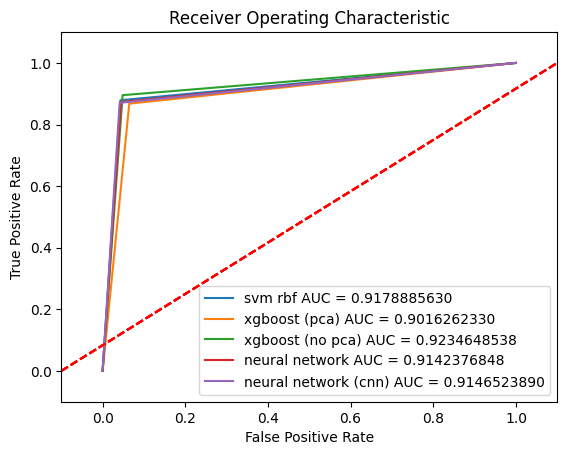

In [53]:
for model, name in zip(models, model_names):
    preds = model.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
 
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([-0.1, 1.1], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()